# SI 370 - Homework #2: Data Visualization

Version 2023.09.20.1.CT

For this homework assignment, you will use a dataset similar to one we used in an earlier lecture: the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions. We will go over some planning in class together so you get a feel for what you need to do.

Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [55]:
import pandas as pd
import seaborn as sns
from datetime import datetime

And let's read the data (note: you might need to include path information if the data files are not in the same directory as this notebook):

In [56]:
movies = pd.read_csv('../data/ml-latest-small/movies.csv')
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
tags = pd.read_csv('../data/ml-latest-small/tags.csv')

In [57]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year.

**Hint**: The year is always the middle 4 characters of the last 6 characters of the title.  You can use the `str` accessor to extract the year from the title.

**Hint**: Review the pandas date and time functionality, in particular the `to_datetime()` function.

In [58]:
# insert your code here

def get_year(row):
    cutoff = row[-5:-1]
    if cutoff.isdigit():
        return cutoff
    return None

In [59]:
movies["year"] = movies["title"].apply(get_year)

In [60]:
movies = movies.dropna(subset = "year")

In [61]:
movies["year"] = pd.to_datetime(movies["year"])

/var/folders/87/p9hpbw597nb9frsx8622mh_c0000gn/T/ipykernel_4474/2446363308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["year"] = pd.to_datetime(movies["year"])


In [62]:
def get_decade(date):
    return str(date.year // 10 * 10) 

In [63]:
movies["decade"] = movies["year"].apply(get_decade)

/var/folders/87/p9hpbw597nb9frsx8622mh_c0000gn/T/ipykernel_4474/3083149769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["decade"] = movies["year"].apply(get_decade)


In [64]:
decade_count = movies.groupby("decade")["movieId"].nunique().reset_index()

[Text(0.5, 1.0, 'Number of Movies Per Decade'),
 Text(0.5, 0, 'Decade'),
 Text(0, 0.5, 'Movie Count')]

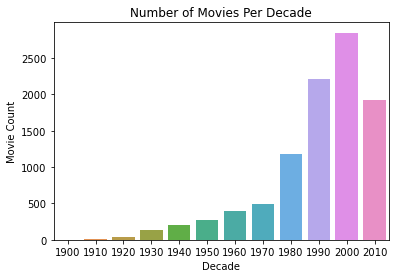

In [65]:
sns.barplot(data = decade_count, x = "decade", y = "movieId").set(title = "Number of Movies Per Decade", xlabel = "Decade", ylabel = "Movie Count")

From the bar plot we can see that the number of movies per decade is left skewed. We can also see that the number of movies per decade significantly increases from 1900 to 2000, however drops in 2010.

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

In [66]:
# insert your code here

movies["genre"] = movies.pop("genres").str.split("|")

movies_exploded = movies.explode("genre")

/var/folders/87/p9hpbw597nb9frsx8622mh_c0000gn/T/ipykernel_4474/584055342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["genre"] = movies.pop("genres").str.split("|")


In [67]:
genre_count = movies_exploded.groupby("genre")["movieId"].nunique().reset_index()

[Text(0, 0, '(no genres listed)'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Adventure'),
 Text(3, 0, 'Animation'),
 Text(4, 0, 'Children'),
 Text(5, 0, 'Comedy'),
 Text(6, 0, 'Crime'),
 Text(7, 0, 'Documentary'),
 Text(8, 0, 'Drama'),
 Text(9, 0, 'Fantasy'),
 Text(10, 0, 'Film-Noir'),
 Text(11, 0, 'Horror'),
 Text(12, 0, 'IMAX'),
 Text(13, 0, 'Musical'),
 Text(14, 0, 'Mystery'),
 Text(15, 0, 'Romance'),
 Text(16, 0, 'Sci-Fi'),
 Text(17, 0, 'Thriller'),
 Text(18, 0, 'War'),
 Text(19, 0, 'Western')]

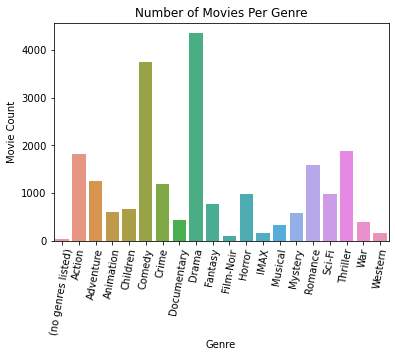

In [68]:
ax = sns.barplot(data=genre_count, x="genre", y="movieId")
ax.set(title="Number of Movies Per Genre", xlabel="Genre", ylabel="Movie Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


From the bar plot above, we can see that Comedies and Dramas have the most movies in this data set. Conversely, we see that Film-Noir, iMAX, and Western have the least.

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


[Text(0.5, 1.0, 'Ratings Distribution'), Text(0.5, 0, 'Rating')]

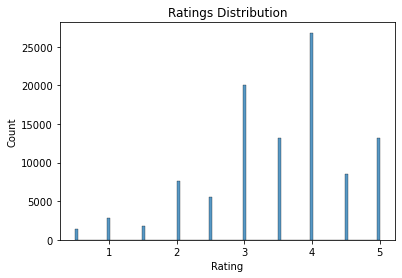

In [69]:
sns.histplot(data = ratings, x="rating").set(title = "Ratings Distribution", xlabel = "Rating")

[Text(0.5, 1.0, 'Ratings Distribution'), Text(0, 0.5, 'Rating')]

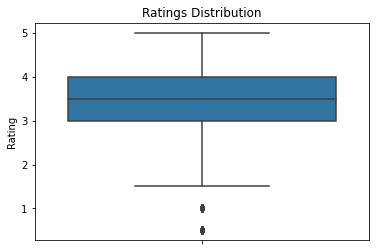

In [70]:
sns.boxplot(data = ratings, y="rating").set(title = "Ratings Distribution", ylabel = "Rating")

From the histogram, we can see that the highest rating counts occur on ratings with whole numbers rather than ratings with decimals. From the boxplot, we can see than the median rating score is around 3.5 with somewhat symmetrical distribution.

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

The highest rating counts occur on ratings with whole numbers rather than ratings with decimals.

In [71]:
# insert your code here

def convert_time(time):
    return datetime.fromtimestamp(time)

ratings["timestamp"] = ratings["timestamp"].apply(convert_time)

[Text(0.5, 1.0, 'Rating vs. Timestamp'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Timestamp')]

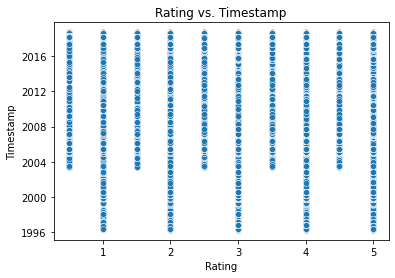

In [72]:
sns.scatterplot(data = ratings, x = "rating", y = "timestamp").set(title = "Rating vs. Timestamp", xlabel = "Rating", ylabel = "Timestamp")


From the scatterplot, we can see that no half ratings occur before 2004. Therefore, a reason as to why their are less half number ratings compared to whole number ratings in the previous problem is due to the fact that half ratings were added / allowed after 2004.

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [73]:
start_date = pd.to_datetime('1996-03-29')
end_date = pd.to_datetime('2018-09-24')


filtered_df = ratings[(ratings['timestamp'] >= start_date) & (ratings['timestamp'] <= end_date)]

filtered_df["userId"].nunique()


610

First, I filtered the ratings data to only have rows with timestamps between 1996-03-29 and 2018-09-24. Then, I counted the number of unique users between that time frame.

### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

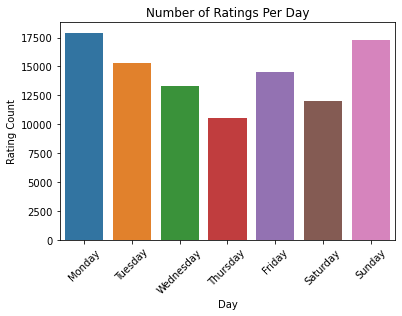

In [74]:
# insert your code here

ratings['day_of_week'] = ratings['timestamp'].dt.day_name()

rating_count =ratings.groupby("day_of_week")["rating"].count().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(data=rating_count, x="day_of_week", y="rating", order=days_order)
ax.set(title="Number of Ratings Per Day", xlabel="Day", ylabel="Rating Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

From the bar plot, we can see that the number of rating per day is somewhat symetrical. The days with the most ratings occur on Monday's and Sunday's. The day with the least number of ratings occur on Thursday's.

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [75]:
# insert your code here

def tag_length(tag):
    return len(tag) 

tags["taglength"] = tags["tag"].apply(tag_length)

tags

,userId,movieId,tag,timestamp,taglength
0,2,60756,funny,1445714994,5
1,2,60756,Highly quotable,1445714996,15
2,2,60756,will ferrell,1445714992,12
3,2,89774,Boxing story,1445715207,12
4,2,89774,MMA,1445715200,3
...,...,...,...,...,...
3678,606,7382,for katie,1171234019,9
3679,606,7936,austere,1173392334,7
3680,610,3265,gun fu,1493843984,6
3681,610,3265,heroic bloodshed,1493843978,16


I used the len() function to count the number of characters in the tag column (including spaces) and saved it in a column called "taglength".

### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

[Text(0.5, 1.0, 'Tag Length Distribution'), Text(0.5, 0, 'Tag Length')]

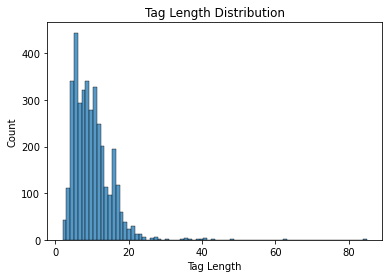

In [92]:
# insert your code here


sns.histplot(data = tags, x="taglength", bins = 80).set(title = "Tag Length Distribution", xlabel = "Tag Length")


From the histogram above, we can see that the tag length distribution is right skewed. There tends to be the most tags with lengths between 0 to 20 characters, with a peak around 7 characters.

### Q7:
Create a visualization that shows the average rating for each genre.


In [77]:
# insert your code here

In [78]:
rating_and_movies = pd.merge(movies_exploded, ratings, on='movieId', how='inner')

In [79]:
genre_mean = rating_and_movies.groupby("genre")["rating"].mean().reset_index()

[Text(0, 0, '(no genres listed)'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Adventure'),
 Text(3, 0, 'Animation'),
 Text(4, 0, 'Children'),
 Text(5, 0, 'Comedy'),
 Text(6, 0, 'Crime'),
 Text(7, 0, 'Documentary'),
 Text(8, 0, 'Drama'),
 Text(9, 0, 'Fantasy'),
 Text(10, 0, 'Film-Noir'),
 Text(11, 0, 'Horror'),
 Text(12, 0, 'IMAX'),
 Text(13, 0, 'Musical'),
 Text(14, 0, 'Mystery'),
 Text(15, 0, 'Romance'),
 Text(16, 0, 'Sci-Fi'),
 Text(17, 0, 'Thriller'),
 Text(18, 0, 'War'),
 Text(19, 0, 'Western')]

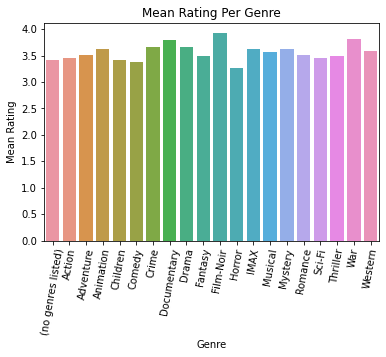

In [80]:
ax = sns.barplot(data=genre_mean, x="genre", y="rating")
ax.set(title="Mean Rating Per Genre", xlabel="Genre", ylabel="Mean Rating")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

The bar plot above of the avergae rating per genre is pretty uniform. The genre with the highest mean rating is Film-Noir and the genre with the lowest mean rating is Horror.

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

[Text(0.5, 1.0, 'Rating Count Distribution Per Decade and Overall Score'),
 Text(0.5, 6.800000000000011, 'Decade'),
 Text(6.800000000000011, 0.5, 'Rating Count')]

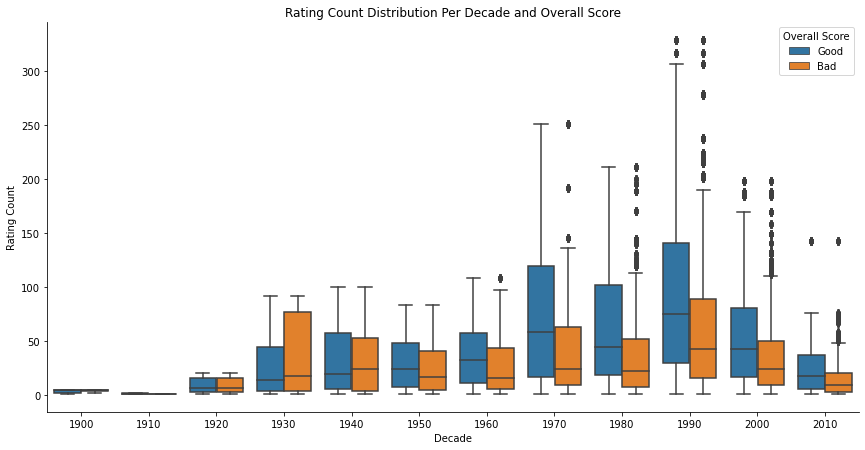

In [94]:
# insert your code here

def good_or_bad(rating):
    if rating >= 3.5:
        return "Good"
    return "Bad"

rating_and_movies2 = pd.merge(movies, ratings, on='movieId', how='inner')

rating_and_movies2["Overall Score"] = rating_and_movies2["rating"].apply(good_or_bad)

movie_count = rating_and_movies2.groupby("movieId")["rating"].count()

merged_movie_count = pd.merge(rating_and_movies2, movie_count, on='movieId', how='inner')

decade_order = ['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', "2010"]

sns.relplot(height=6, aspect=2)
sns.boxplot(data=merged_movie_count, x="decade", y="rating_y", hue="Overall Score", order = decade_order).set(title = "Rating Count Distribution Per Decade and Overall Score", xlabel = "Decade", ylabel = "Rating Count")

The boxplots show the distribution of rating counts across decades and overall score. As we can see above, the highest median rating count occurs in 1990 for movies with "good" scores. We can also see that the spread in 1990 and 1970 is the largest, with the smallest spreads being in 1910 and 1900.

## END OF NOTEBOOK